# Modèle de Régression Linéaire

1. **Principe & Application**
2. **Entrainement d'un modèle de regression linéaire simple**
    1. Mesurer l'erreur
    2. Reduire l'erreur, Descente de Gradient et Taux d'apprentissage
    3. Evaluation du Modèle
3. **Modèle linéaire pour des cas plus complexe**
    1. Plusieurs variables explicatives quantitatives
    2. Variables explicatives qualitatives
        1. Sans interaction
        2. Avec interaction

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV 
from sklearn.model_selection import train_test_split
from numpy import sqrt
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

#library to create the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn import set_config
from IPython.display import Image

In [2]:
from make_data import make_data_simple, make_data_mult_quantitative, make_data_intercept, make_data_slope, make_data_poly    

## 1. Principe et Application

#### Tout d'abord générons des données fictives

In [3]:
df = make_data_simple()

#### Explorons brièvement nos données

In [4]:
df.describe()

,x,y
count,200.000000,200.000000
mean,90.205292,370.745828
std,31.843658,120.165403
min,13.086876,71.571274
25%,65.779839,288.697617
50%,89.646382,372.262991
75%,112.345826,443.870019
max,158.270212,677.035757


In [5]:
df.head()

,x,y
0,78.161016,385.866222
1,119.820117,559.700550
2,65.385594,318.963217
3,119.921603,538.422307
4,70.299510,339.626987


#### Leurs distributions

array([[<AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>]], dtype=object)

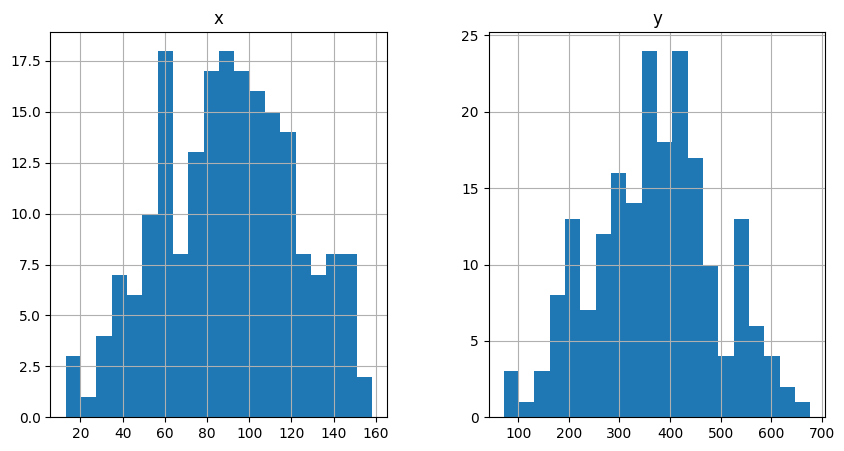

In [6]:
df.hist(bins=20, figsize=(10,5))

#### D'éventuelles corrélations entre les données

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


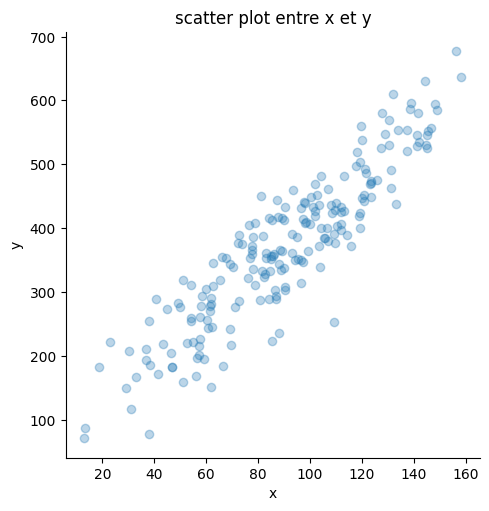

In [7]:
sns.lmplot('x', 'y', df, scatter_kws={'alpha':0.3}, fit_reg=False)
plt.title('scatter plot entre x et y')
plt.show()

#### On observed une relation évidente entre x et y, plus x est grand, plus y est grand, et cette relation semble linéaire.
#### Peut-on utiliser x pour prédire y? C'est l'objectif du modèle linéaire!
#### Le modèle linéaire est mathématiquement assez simple puisqu'il sagit d'une polynome de 1ère degré

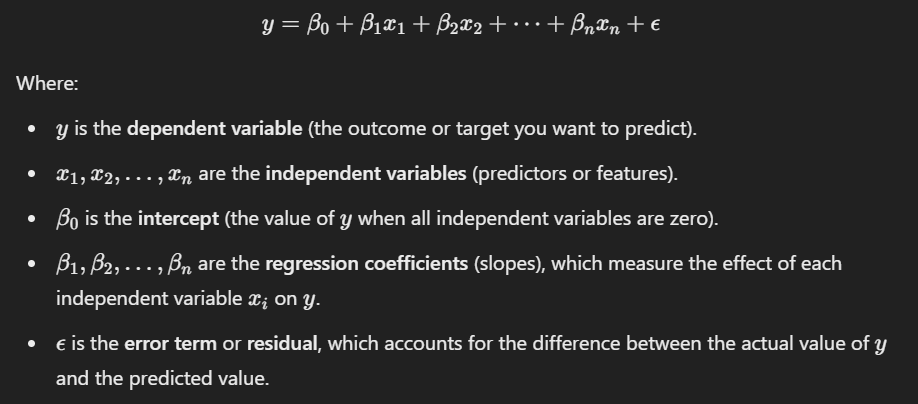

In [8]:
Image("image/LM.png")

#### Pour un cas simple avec une variable explicative

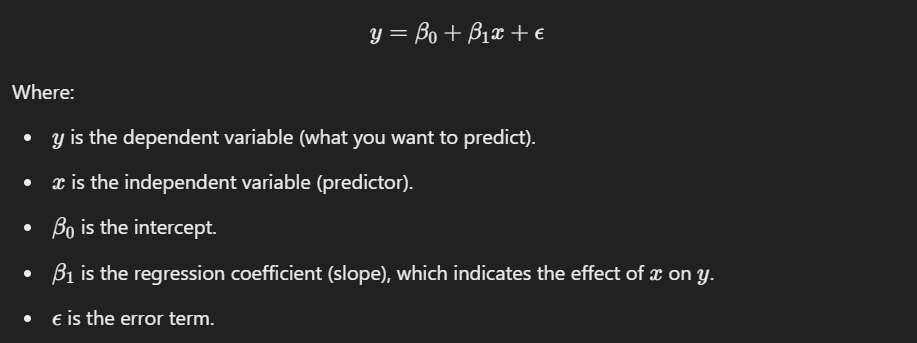

In [9]:
Image("image/LM_simple.png")

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


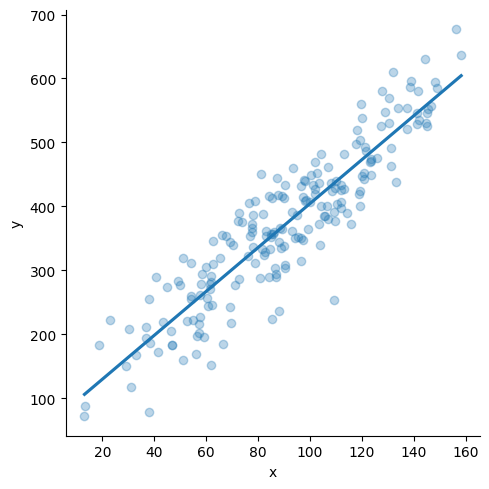

In [10]:
#calculate the correlation line between x and y
sns.lmplot('x', 'y', df, ci=None, scatter_kws={'alpha':0.3})

#### Une nouvelle valeur de **X** (instance) projeté sur la droite permettrait alors d'obtenir une prédiction de **Y**

#### Déterminons les paramètres du modèle, c'est à dire ici la pente (slope) et l'ordonnée à l'origine (intercept) avec LinearRegression du package sklearn

In [11]:
#import du modèle
from sklearn.linear_model import LinearRegression
#Isolation de la variable à prédire (y) et des variables explicatives (X) afin d'entrainer le modèle
X = df[['x']]
y = df[['y']]
#instanciation du modèle
model = LinearRegression()
#Entrainement du modèle. La méthode .fit est commune à tous les modèles de scikit-learn
#Elle prend en paramètre les variables explicatives et la variable à prédire, et permet d'ajuster les paramètres du modèle
model.fit(X, y)
print(f'Les coéfficients du modèle sont : slope : {model.coef_[0][0]} / intercept : {model.intercept_[0]}')

Les coéfficients du modèle sont : slope : 3.4327916067144666 / intercept : 61.08986052359995


#### Notre modèle est maintenant entrainé et nous pouvons nous servir des paramètres afin de prédire **y** à partir de nouvelles valeurs de **x**

In [12]:
#nous créons un nouvel individu dont nous voulons prédire la valeur de y
new_instance = 128
#nous utilisons la formule du modèle pour prédire la valeur de y
slope = model.coef_[0]
intercept = model.intercept_
pred = slope * new_instance + intercept
print(f'La valeur prédite pour x={new_instance} est {pred[0]}')

La valeur prédite pour x=128 est 500.4871861830517


In [13]:
print(f'La valeur prédite pour X = {new_instance} est égale à {pred.max()}')

La valeur prédite pour X = 128 est égale à 500.4871861830517


/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


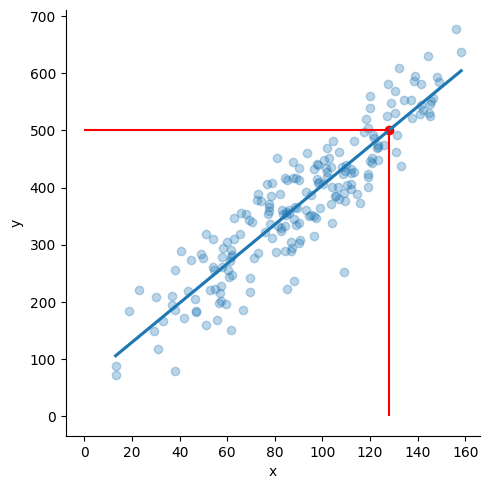

In [14]:
#create a plot with the regression line
sns.lmplot('x', 'y', df, ci=None, scatter_kws={'alpha':0.3})
#add vertical line for the new instance
#use hlines to add an horizontal line
plt.vlines(new_instance, 0, pred.max(), color='red')
#add the prediction point
plt.scatter(new_instance, pred, color='red')
#add the hortizontal line for the prediction
plt.hlines(pred, 0, new_instance, color='red')

#### Ici nous avons donné la prédiction d'une valeur unique, la méthode .predict de sklearn permet de renvoyer un vector de prediction de Y pour un vector de nouvelles instances de X

In [15]:
#### Générons une série de aléatoire de valeurs pour x
#Note : la méthode .predict attend un tableau de valeurs, c'est pourquoi nous utilisons la méthode .reshape(-1, 1) pour transformer notre vecteur en tableau
new_x_values = np.random.randint(0, 100, 10).reshape(-1, 1)
print(new_x_values)

[[51]
 [66]
 [24]
 [92]
 [46]
 [ 8]
 [92]
 [99]
 [96]
 [45]]


In [16]:
#Utilisons la méthode .predict pour prédire les valeurs de y correspondantes
pred = model.predict(new_x_values)
print(pred)


[[236.16223247]
 [287.65410657]
 [143.47685908]
 [376.90668834]
 [218.99827443]
 [ 88.55219338]
 [376.90668834]
 [400.93622959]
 [390.63785477]
 [215.56548283]]


/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


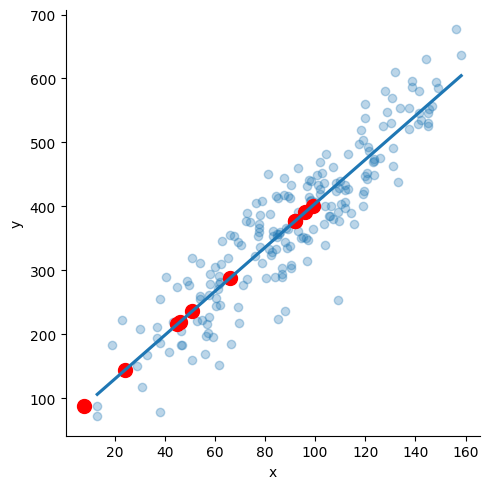

In [17]:
sns.lmplot('x', 'y', df, ci=None, scatter_kws={'alpha':0.3})
plt.scatter(new_x_values, pred, color='red', s=100)

## 2. **Entrainement d'un modèle de régression linéaire simple**

### 1. **Mesurer l'erreur**

#### Les meilleurs paramètres du modèle est obtenue en minimisant une fonction de coût (cost fonction). Dans le cas des modèles de régression, l'erreur globale du modèle est généralement déterminée comme la somme des erreurs au carré, une erreurs étant la différence entre la valeur prédite par le modèle et la valeur observée.
#### On appelle cette métrique la MSE (mean squared error) ou sa variante RMSE (root mean squared error). 

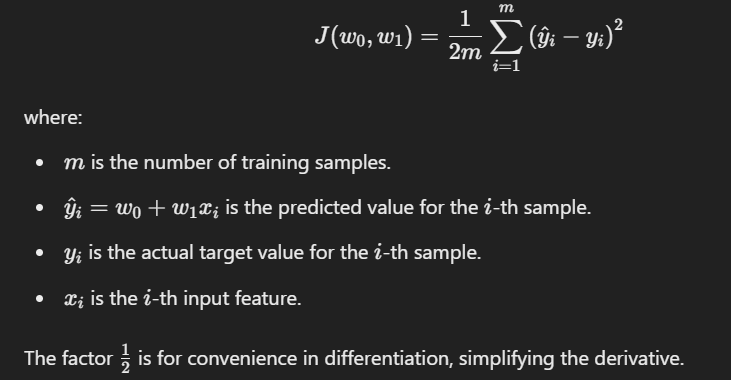

In [18]:
Image("image/MSE.png")

#### Calculons la MSE du modèle

In [19]:
#Rajoutons une colonne pred à notre dataframe contenant les valeurs prédites par notre modèle
df['pred'] = model.predict(X)
#Calculons les erreurs de prédiction
df['error'] = df['y'] - df['pred']
#Calculons le carré des erreurs de prédiction
df['squared_error'] = df['error'] ** 2
#Calculons le Mean Squared Error
MSE = df['squared_error'].sum()/(df.shape[0] * 2)
print(f'Le Mean Squared Error est de {MSE}')

Le Mean Squared Error est de 1239.0088801279699


#### Attention!!! ici la MSE est obtenue sur les données d'entrainement, et celle-ci peut être différente sur des données de test, par example si le modèle est surentrainé et généralise mal sur de nouvelles données.  

#### Calculons la MSE en fonction de l'ordonnée à l'origine (b0)

In [20]:
def pred_new_error(df, slope, intercept):
    df['pred'] = slope * df['x'] + intercept
    df['error'] = df['pred'] - df['y'] 
    df['squared_error'] = (df['pred'] - df['y'])**2
    return df

df_error_intercept = pd.DataFrame(data = {'intercept': [], 'MSE': []})
for intercept_ in np.arange(-150, 220, 1):
    df = pred_new_error(df, slope, intercept_)
    MSE_intercept = MSE = df['squared_error'].sum()/(df.shape[0] * 2)
    df_error_intercept = pd.concat([df_error_intercept, pd.DataFrame(data = {'intercept': [intercept_], 'MSE': [MSE_intercept]})])

Text(0.5, 1.0, "MSE en fonction de l'intercept b0")

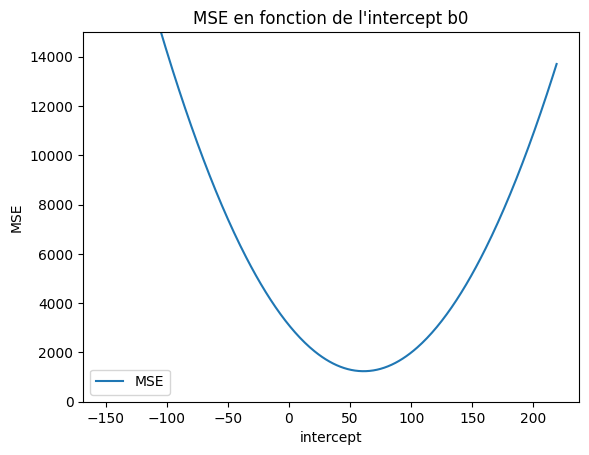

In [21]:
#make a plot of the grad_intercept
df_error_intercept.plot(x='intercept', y='MSE')
#on ajoute le label des axes et le titre
plt.xlabel('intercept')
plt.ylabel('MSE')   
#on fixe les limites des axes
plt.ylim(0, 15000) 
#on ajoute un titre
plt.title('MSE en fonction de l\'intercept b0')

#### On observe un minimum de la MSE pour une valeur de l'intercept b0. En somme la valeur de l'intercept b0 pour laquel le modèle s'ajuste le mieux aux données lorsque la valeur de la pente b1 est constante.     

#### Vérifions la valeur de b0 produisant le minimum d'erreur

In [22]:
df_error_intercept[df_error_intercept['MSE'] == df_error_intercept['MSE'].min()]

,intercept,MSE
0,61.0,1239.012918


#### Calculons maintenant la MSE en fonction de la pente (b1)

In [23]:
df_error_slope = pd.DataFrame(data = {'slope': [], 'MSE': []})
for slope_ in np.arange(2, 5.2, 0.01):
    df = pred_new_error(df, slope_, intercept)
    MSE = df['squared_error'].sum()/(df.shape[0] * 2)
    df_error_slope = pd.concat([df_error_slope, pd.DataFrame(data = {'slope': [slope_], 'MSE': [MSE]})])

Text(0.5, 1.0, 'MSE en fonction de la pente b1')

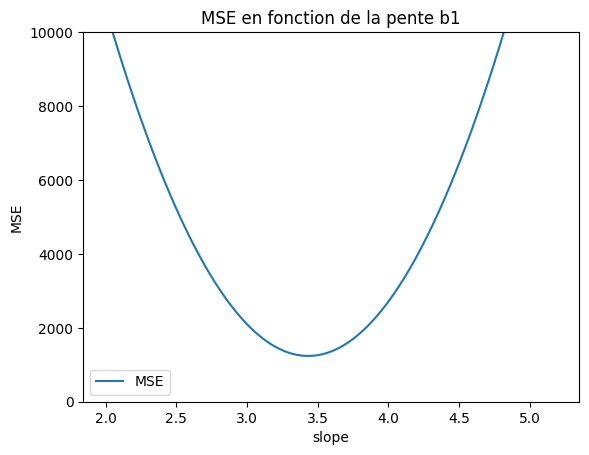

In [24]:
#make a plot of the grad_intercept
df_error_slope.plot(x='slope', y='MSE')
#on ajoute le label des axes et le titre
plt.xlabel('slope')
plt.ylabel('MSE')
plt.ylim(0, 10000) 
plt.title('MSE en fonction de la pente b1')

#### Là aussi nous observons un minimum de la MSE pour une valeur de la pente b1.

In [25]:
df_error_slope[df_error_slope['MSE'] == df_error_slope['MSE'].min()]

,slope,MSE
0,3.43,1239.044518


#### Faisons la même expérience avec une valeur d'intercept différente

In [26]:
for slope_ in np.arange(3.5, 7, 0.01):
    df = pred_new_error(df, slope_, -100)
    MSE = df['squared_error'].sum()/(df.shape[0] * 2)
    df_error_slope = pd.concat([df_error_slope, pd.DataFrame(data = {'slope': [slope_], 'MSE': [MSE]})])

Text(0.5, 1.0, 'MSE en fonction de la pente b1 pour deux valeur de b0')

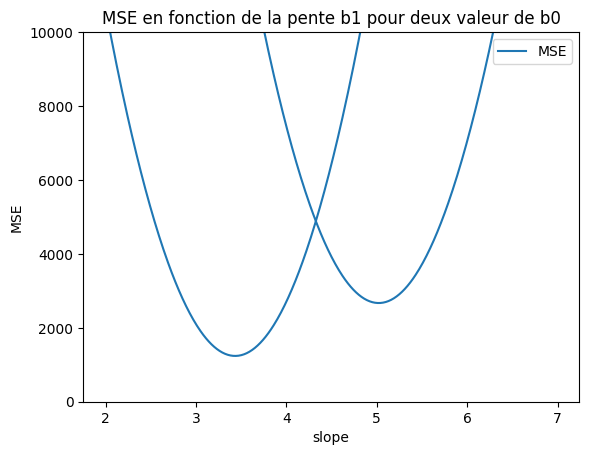

In [27]:
#make a plot of the grad_intercept
df_error_slope.plot(x='slope', y='MSE')
#on ajoute le label des axes et le titre
plt.xlabel('slope')
plt.ylabel('MSE')
plt.ylim(0, 10000) 
plt.title('MSE en fonction de la pente b1 pour deux valeur de b0')

#### On voit bien ici que nous obtenons deux valeurs différentes de la pente b1 pour deux valeurs différentes de l'intercept b1 afin d'obtenir une MSE minimale. Aussi les valeurs minimales observées pour la MSE diffèrent. 

#### L'objectif est donc de pouvoir optimiser les deux paramètres b0 et b1 en même temps afin d'entrainer le modèle.

## 2. **Entrainement d'un modèle de régression linéaire simple**
### 2. **Réduire l'erreur, Descente de Gradient et Taux d'apprentissage**

#### Entrainer un modèle, c'est ajusté ses paramètres afin de réduire l'erreur globale, cette erreur étant déterminée grâce à la cost fonction.

#### La méthode de descente de gradient est largement utilisée dans de nombreux problèmes d'apprentissage machine afin d'entrainer les modèles. Elle se base sur le fait que la dérivée partielle de la cost function permet d'obtenir le gradient local de l'erreur pour chaque paramètres. Les paramètres sont optimisés de manière itérative afin de minimiser l'erreur du modèle. La vitesse ou les pas pris à chaque itération est appelé: le taux d'apprentissage (e.g. learning rate).

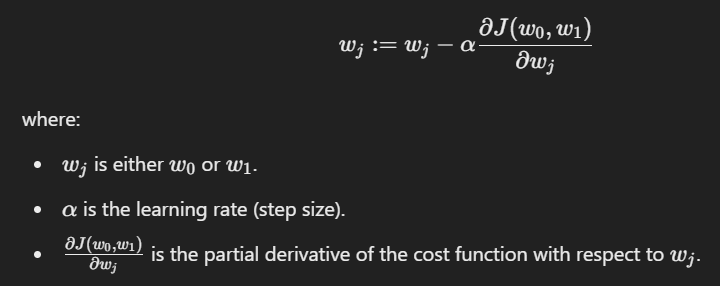

In [28]:
Image("image/GD_update_rule.png")

#### Le principe est le suivant. A chaque itération les dérivées partielles sont calculées pour chaque paramètres du modèle. Les nouvelles valeurs du paramètre sont égales à leurs anciennes auxquellles on soustrait leurs gradients locaux respectifs de l'erreur multiplié par le taux d'apprentissage.

#### Regardons la dérivée partielle pour l'intercept pour une valeur non optimale de l'intercept (e.g. intercept_ = -50)

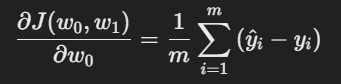

In [29]:
Image("image/intercept_derivative.png")

#### C'est la moyen de la somme des erreurs

In [30]:
#calculons la moyenne de la somme des erreurs pour l'intercept
intercept_ = -50.0
df = pred_new_error(df, slope, intercept_)
grad_intercept = df['error'].mean()
print(f'La moyenne de la somme des erreurs est : {grad_intercept}')

La moyenne de la somme des erreurs est : -111.08986052359984


#### Regardons le gradient local de l'erreur pour cette valeur de l'intercept

Text(0.5, 1.0, "MSE en fonction de l'intercept b0")

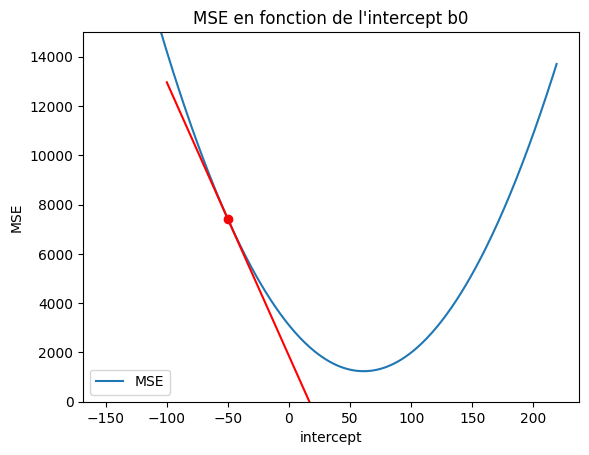

In [31]:
#make a plot of the grad_intercept
df_error_intercept.plot(x='intercept', y='MSE')
MSE = df['squared_error'].sum()/(df.shape[0] * 2)
plt.scatter(intercept_, MSE, color='red')
#add a line to show the gradient using parametric equation
grad_line_slope = grad_intercept
grad_line_intercept = MSE - (grad_line_slope * intercept_)
grad_x = np.arange(-100, 100, 1)
grad_y = grad_line_slope * grad_x + grad_line_intercept
df_grad_line = pd.DataFrame(data = {'grad_x' : grad_x, 'grad_y' : grad_y})
plt.plot(df_grad_line['grad_x'], df_grad_line['grad_y'], color='red')
#on ajoute le label des axes et le titre
plt.xlabel('intercept')
plt.ylabel('MSE')   
#on fixe les limites des axes
plt.ylim(0, 15000) 
#on ajoute un titre
plt.title('MSE en fonction de l\'intercept b0')

#### Mettons à jour le paramètre en suivant la règle de la descente de gradient 

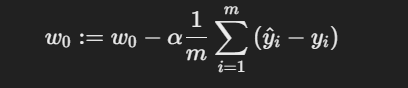

In [32]:
Image("image/GD_intercept.png")

In [33]:
#faisons d'abord une function pour faire le graphique...
def make_GD_graph(df, intercept_, grad_intercept):
    #make a plot of the grad_intercept
    df_error_intercept.plot(x='intercept', y='MSE')
    MSE = df['squared_error'].sum()/(df.shape[0] * 2)
    plt.scatter(intercept_, MSE, color='red')
    #add a line to show the gradient using parametric equation
    grad_line_slope = grad_intercept
    grad_line_intercept = MSE - (grad_line_slope * intercept_)
    grad_x = np.arange(-100, 100, 1)
    grad_y = grad_line_slope * grad_x + grad_line_intercept
    df_grad_line = pd.DataFrame(data = {'grad_x' : grad_x, 'grad_y' : grad_y})
    plt.plot(df_grad_line['grad_x'], df_grad_line['grad_y'], color='red')
    #on ajoute le label des axes et le titre
    plt.xlabel('intercept')
    plt.ylabel('MSE')   
    #on fixe les limites des axes
    plt.ylim(0, 15000) 
    #on ajoute un titre
    plt.title('MSE en fonction de l\'intercept b0')
    return plt.show()

#### Faisons une fonction pour updater la valeur de l'intercept en suivant la règle de la descente de gradient

In [34]:
#définissions un taux d'apprentissage (lr = learning rate)
lr = 0.1
#calculons la nouvelle valeur de l'intercept
def GD_update_intercept(df, lr, intercept_, slope):
    grad_intercept = df['error'].mean()
    intercept_ = intercept_ - lr * grad_intercept
    df = pred_new_error(df, slope, intercept_)
    return intercept_, grad_intercept, df

#### Regardons la valeur de l'intercept après plusieurs itérations

In [35]:
#on définit un taux d'apprentissage (lr = learning rate)
lr = 0.1
#on initialise la valeur de l'intercept
intercept_ = -50
df = pred_new_error(df, slope, intercept_)
grad_intercept = df['error'].mean()

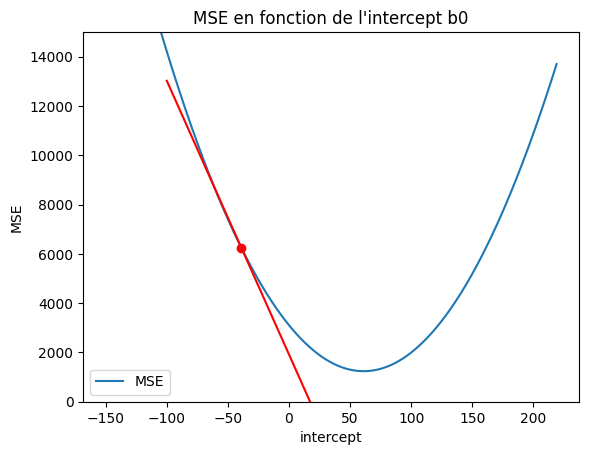

In [36]:
intercept_, grad_intercept, df = GD_update_intercept(df, lr, intercept_, slope)
make_GD_graph(df, intercept_, grad_intercept)

#### Appliquons la méthode afin d'optiminer les deux paramètres b0 et b1
#### La formule de la dérivée partielle pour la pente est la suivante:

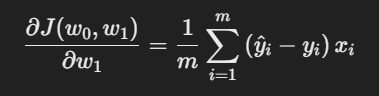

In [37]:
Image("image/slope_derivative.png")

#### C'est la moyenne des erreurs multiplées par la variable explicative 

#### et son implémentation pour la descente de gradient

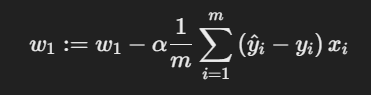

In [38]:
Image("image/GD_slope.png")

#### Intégrons à notre fonction 

In [39]:
def GD_update_parameter(df, lr, intercept_, slope_):
    #update the intercept
    grad_intercept = df['error'].mean()
    intercept_ = intercept_ - lr * grad_intercept
    #update the slope
    grad_slope = (df['error'] * df['x']).mean()
    slope_ = slope_ - lr * grad_slope
    #update the prediction
    df = pred_new_error(df, slope_, intercept_)
    return intercept_, slope_, df

#### **Ici l'implementation avec numpy**
#### **Etape 1:** On doit d'abord mettre nos données en forme, deux numpy array en 2D

In [40]:
#pour X
X = df['x']
#transforme X en np.array
X = X.values
#reshape X pour qu'il soit en 2D    
X = X.reshape(200, 1).astype(np.float64)
#et pour y
y = df['y']
#transforme y en np.array
y = y.values
#reshape y pour qu'il soit en 2D
y = y.reshape(200, 1).astype(np.float64)

In [41]:
X[0:5]

array([[ 78.16101613],
       [119.8201166 ],
       [ 65.3855941 ],
       [119.92160264],
       [ 70.29950962]])

#### **Etape 2:** On définit nos hyperparamètres

In [42]:
# Step 2: Define 
learning_rate = 0.00001
n_iterations = 100
m = len(X)  # Number of training examples

#### **Etape 3:**  On ajoute le terme de la pente (X0 = 1) pour w0 dans X, une colonne avec des 1

In [43]:
X = np.c_[np.ones((m, 1)), X]
X[0:5]

array([[  1.        ,  78.16101613],
       [  1.        , 119.8201166 ],
       [  1.        ,  65.3855941 ],
       [  1.        , 119.92160264],
       [  1.        ,  70.29950962]])

#### **Etape 4:** On initialize nos paramètres w0 et w1 de manière aléatoire 

In [44]:
theta = np.random.randn(2, 1)  # Random initialization
theta

array([[-2.04324779],
       [-0.28599685]])

#### **Etape 5:** On définit la fonction de coût (MSE : Mean Squared Error)

In [45]:
def compute_cost(X, y, theta):
    #on multiplie X par theta (chaque les valeurs dans les colonnes par le paramètre correspondant et on addition le tout par ligne)  
    predictions = X.dot(theta)
    #on calcule l'erreur de prédiction
    errors = predictions - y
    #on calcule le Mean Squared Error
    MSE = (1 / (2 * m)) * np.sum(errors ** 2)
    #on retourne le MSE
    return MSE

#### Etape 6: On définit la function de Descente de Gradient

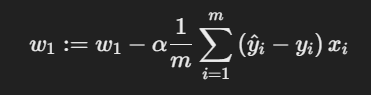

In [46]:
Image("image/GD_slope.png")

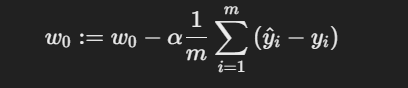

In [47]:
Image("image/GD_intercept.png")

In [48]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    #on crée un tableau pour stocker les valeurs de l'erreur
    cost_history = np.zeros(n_iterations)
    theta_history = np.zeros((n_iterations, 2))
    #on itère sur le nombre de fois voulu afin de mettre à jour les paramètres
    for iteration in range(n_iterations):
        #on calcule les gradients
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        #on met à jour les paramètres
        theta -= learning_rate * gradients  # Update theta using the gradients
        #on stocke la valeur de l'erreur
        cost_history[iteration] = compute_cost(X, y, theta)  # Record the cost
        theta_history[iteration, :] = theta.T
    return theta, cost_history, theta_history

#### **Etape 7:** On lance la descente de gradient

In [49]:
theta_final, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

#### Regardons les résultats

In [50]:
print(f"Paramètres finaux: w0 = {theta_final[0][0]}, w1 = {theta_final[1][0]}")

Paramètres finaux: w0 = -1.9934761421376486, w1 = 4.054685920248248


#### Regardons l'évolution de l'ajustement de la droite aux données lors de l'apprentissage du modèle (e.g. la descente de gradient)

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


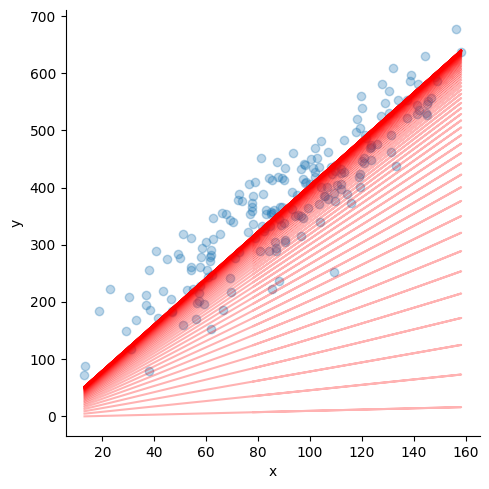

In [51]:
sns.lmplot('x', 'y', df, fit_reg=None, scatter_kws={'alpha':0.3})
for iteration in range(n_iterations):
    plt.plot(df['x'], X.dot(theta_history[iteration, :]), color='red', alpha=0.3)

#### Regardons maintenant la courbe d'apprentissage, c'est l'évolution de l'erreur (valeur de la fonction de function de coût = MSE) en function du nombre d'itération

<AxesSubplot:xlabel='iteration'>

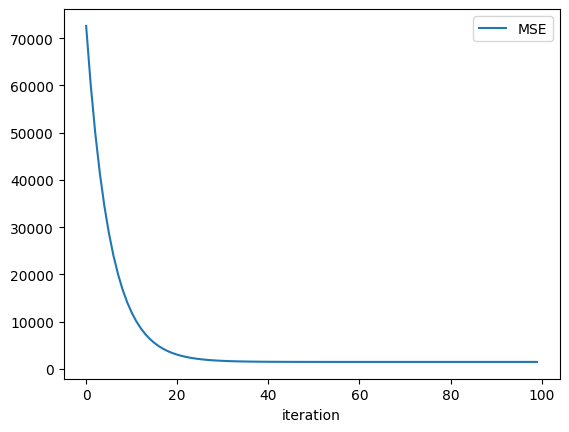

In [52]:
iter = np.arange(0, n_iterations, 1)
cost_history = pd.DataFrame(data = {'iteration': iter, 'MSE': cost_history})
cost_history.plot(x='iteration', y='MSE')

#### La courbe d'apprentissage nous renseigne sur le fait qu'un nombre suffisant ou non d'itérations a permis d'atteindre un minimum pour la fonction de coût
#### Les paramètres optimaux étaient véaisemblablement obtenu ici à partir d'une 30aine itérations 

## 2. **Entrainement d'un modèle de Régression Linéaire**
###     **3. Evaluation du Modèle**

#### Le MSE donne une mesure de l'erreur globale du modèle, c'est pratique mais néanmoins peut digeste car sa valeur dépend du cas étudié (magnitude de X). Une autre métrique plus couramment utilisée et plus digeste est le **coéfficient de détermination R2 (R carré ou R squared)**
#### C'est une mesure de la qualité de l'ajustement entre les valeurs prédites par un modèle et les valeurs réelles. Elle explique la proportion de la variance de la variable expliqué (target) qui est prévisible à partir des variables explicatives (features). 

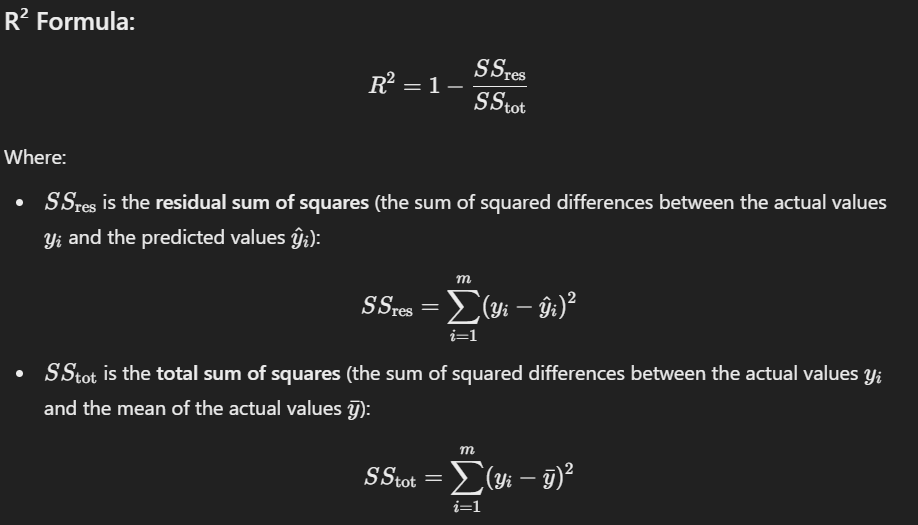

In [53]:
Image("image/R2.png")

#### Le R2 est compris entre 0 et 1. Plus il proche de 1, plus le modèle prédit bien la variable expliquée (cible).

In [54]:
slope_ = theta_final[1][0]
intercept_ = theta_final[0][0]
df = pred_new_error(df, slope_, intercept_)

In [55]:
#implement the R2 score with pandas
def R2_score(df):
    #calculate the mean of y
    y_mean = df['y'].mean()
    #calculate the total sum of squares
    TSS = ((df['y'] - y_mean) ** 2).sum()
    #calculate the residual sum of squares
    RSS = df['squared_error'].sum()
    #calculate the R2 score
    R2 = 1 - (RSS / TSS)
    return R2

In [56]:
R2 = R2_score(df)
#ajust to have only 2 decimals
R2 = round(R2, 2)
print(f'Le R2 score est de {R2}')

Le R2 score est de 0.8


### **Le modèle linéaire repose sur plusieurs hypothèses qui sont souvant difficiles à valider en pratique:** 
#### 1. **Linéarité :** Relation linéaire entre la variable dépendante et les variables indépendantes.
#### 2. **Homoscedasticité :** Variance constante des erreurs à travers les valeurs des variables indépendantes.
#### 3. **Normalité des erreurs :** Les erreurs suivent une distribution normale.
#### 4. **Absence de multicolinéarité :** Pas de corrélation élevée entre les variables indépendantes.
#### On peut vérifier ces hypothèses de façon graphique ou à l'aide de tests statistiques (non abordés dans le cours).
#### Regardons quelques graphiques essentielle

### **Graphique de valeurs observées vs valeurs prédites**

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Observed vs Predicted values')

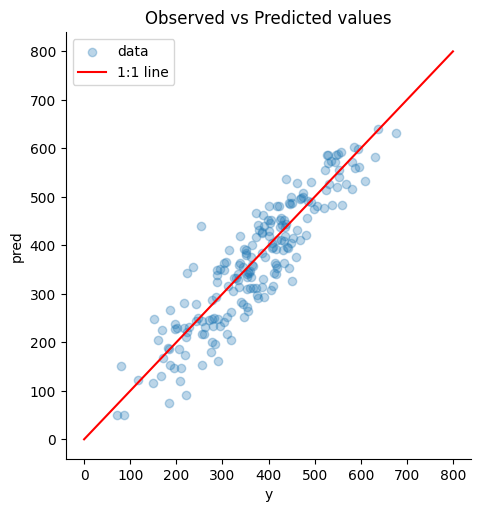

In [57]:
#on fait le graphique des valeurs prédites par le modèle vs les valeurs observées
sns.lmplot('y', 'pred', df, fit_reg=None, scatter_kws={'alpha':0.3})
plt.plot([0, 800], [0, 800], color='red')
#on ajooute le ligne 1:1
plt.legend(['data', '1:1 line'])
plt.title('Observed vs Predicted values')

#### Si la répartition des points suit la ligne 1:1, alors prédictions sont "bonnes"
#### Si cela n'est pas le cas il y a un problème avec le modèle, il explique mal les données (modèle non approprié, nécessité d'ajouter des variable explicatives) 

### **Répartition des résidus (des erreurs)**

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


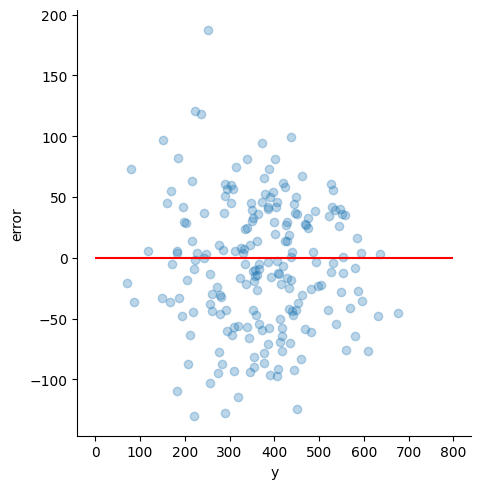

In [58]:
#add a plot of the residuals
#set size of the plot
sns.lmplot('y', 'error', df, fit_reg=None, scatter_kws={'alpha':0.3})
plt.hlines(0, 0, 800, color='red')

#### Les résidues sont répartis de manière homogène!

### **Distribution des résidus**

<AxesSubplot:>

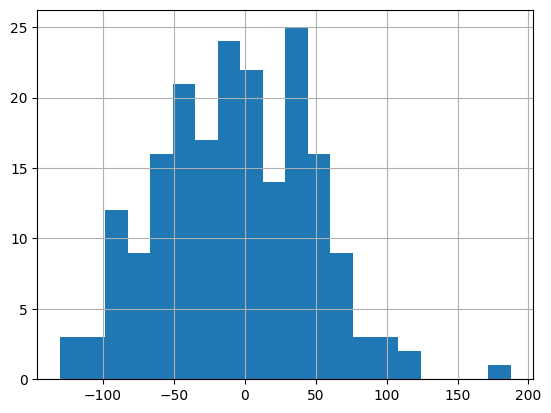

In [59]:
#make a histogram of the residuals
df['error'].hist(bins=20)

#### La distribution des résidus est normale et centrée autour de 0.
#### On peut dire que le modèle est valide mais nous avons à faire à un cas très simple.
#### Voyons des cas plus complexes.

## 3. **Modèle linéaire pour des cas plus complexes**
###    **1. Plusieurs variables explicatives quantitatives**

In [60]:
df = make_data_mult_quantitative()

In [61]:
df.head(5)

,x,y,z,w
0,94.348268,481.850050,1.442337,15.943178
1,86.371593,348.849644,-139.629982,45.787688
2,95.132626,321.116251,-185.589736,42.610498
3,80.020842,321.585738,-122.772120,150.347368
4,90.771506,347.631779,-145.669104,172.246276


#### On peut visualiser rapidement ces données et les relations entre elles en utilisant un pairplot

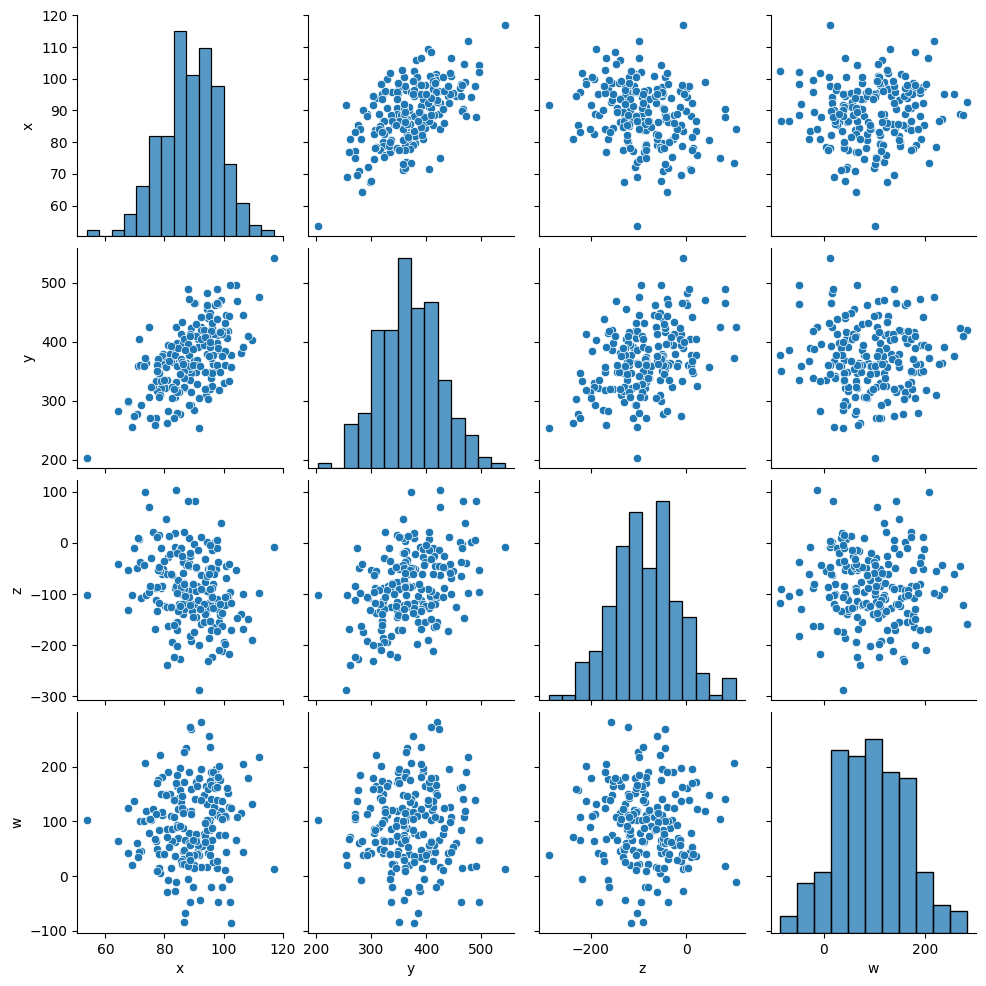

In [62]:
sns.pairplot(df)

#### On implémente l'entrainement du modèle avec la librarie SKLearn et Pandas
#### SKLearn est la librarie de machine learning en python, et dispose d'une très vaste variété d'outils, de modèles, etc...
#### On isole la variable à prédire (y) et les variables explicatives (X) afin d'entrainer le modèle

In [63]:
y = df['y']
X = df[['x']].copy()
X['constant'] = 1

In [64]:
#on vérifie la forme de X
X.head(5)

,x,constant
0,94.348268,1
1,86.371593,1
2,95.132626,1
3,80.020842,1
4,90.771506,1


#### On entraine le modèle et on vérifie le score (R2)

In [65]:
#instanciation du modèle
model = LinearRegression().fit(X, y)
#affichage des coefficients
print(f'Les coéfficients du modèle sont : slope : {model.coef_[0]} / intercept : {model.intercept_}')
#ajoutons les prédictions du modèle à notre dataframe
df['pred'] = model.predict(X)
#calculons le coefficient de détermination R2 avec la méthode .score
R2 = model.score(X, y)
print(f'Le R2 score est de {R2}')

Les coéfficients du modèle sont : slope : 3.3553231817871865 / intercept : 72.57770142805208
Le R2 score est de 0.334968250785053


#### Regardons maintenant avec plusieurs features si le score s'améliore

In [66]:
y = df['y']
#on crée une copie du dataframe contenant toutes les variables explicatives
X = df[['x', 'z', 'w']].copy()
X['constant'] = 1
#on vérifie la forme de X
X

,x,z,w,constant
0,94.348268,1.442337,15.943178,1
1,86.371593,-139.629982,45.787688,1
2,95.132626,-185.589736,42.610498,1
3,80.020842,-122.772120,150.347368,1
4,90.771506,-145.669104,172.246276,1
...,...,...,...,...
195,89.650508,-79.570841,-19.660406,1
196,77.608200,11.159024,170.999478,1
197,76.828279,-168.460880,67.779006,1
198,99.429357,-137.059448,104.566176,1


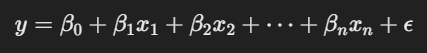

In [67]:
Image("image/LM_formula.png")

#### Ici il faut imaginer que chaque papramètre de pente est associé à une variable explicative, donc une colonne de X.
#### Nous devons donc créer une colonne par paramètre de pente, plus une colonne pour l'intercept (constant, avec des 1 dedans)

In [68]:
model = LinearRegression().fit(X, y)
df['pred'] = model.predict(X)
#give the R2 score
R2 = model.score(X, y)
print(f'Le R2 score est de {R2}')

Le R2 score est de 0.6396707601135491


#### L'utilisation de plusieurs variables explicatives améliore ici la qualité prédictive du modèle

#### On peut visualiser (en partie) le modèle qui crée une "surface"
#### Ici y en fonction de x et z

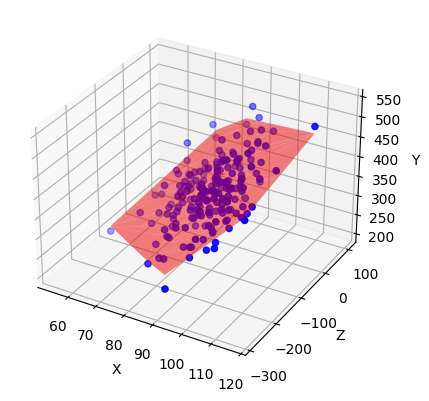

In [69]:
#make a 3d graph of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['x'], df['z'], df['y'], c='b', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')

ax.plot_trisurf(df['x'], df['z'], df['pred'], color='red', alpha=0.5, label="Predicted surface")

#### En N dimension cela devient plus compliqué de visualiser...

#### **Explicabilité du modèle:** Des analyses statistiques seront nécessaires à ce stade (ANOVA : Analysis of Variance, ANCOVA : Analysis of Cavariance, MANOVA : Multuivariate Analysis of Covariance) afin de mieux comprendre l'effet des différentes features dans la prédiction de la cible. Mais cela ne sera pas abordé ici.

## 3. **Modèle linéaire pour des cas plus complexes**
###    **1. Ajout de variables qualitatives/catégorielles**
#### **1. Sans interaction**

#### Des variables explicatives catégorielles peuvent être utilisés au sein du modéle linéaire, en combinaison avec des variables explicatives quantitatives.   

In [70]:
#chargeons le dataset 
df = make_data_intercept()
df = df.sample(frac=1)
df = df.reset_index(drop=True)

In [71]:
#regardons les premières lignes du dataframe
df.head()

,x,y,type
0,74.917452,346.694430,A
1,90.070992,152.553332,B
2,98.893981,258.347091,B
3,75.463101,346.493438,A
4,69.851849,323.573921,A


#### Nous voyons ici l'ajout d'une variable catégorielle "type"

In [72]:
#ragardons les différentes valeurs uniques pour "type"
df['type'].unique()

array(['A', 'B'], dtype=object)

#### Nous avons deux catégories pour "type", A et B

#### Regardons maintenant les données en utilisant un graphique

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


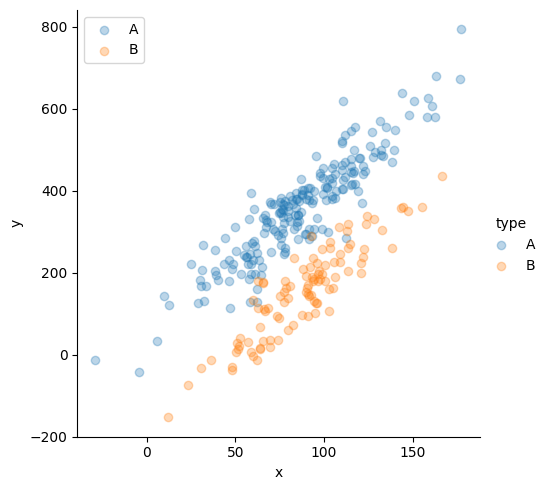

In [73]:
#on peut utiliser la fonction hue= 'type' afin de colorer les points en fonction de la variable 'type'
sns.lmplot('x', 'y', df, hue = 'type', scatter_kws={'alpha':0.3}, fit_reg=False)
plt.legend()
plt.show()

#### On voit ici que A et B représentent deux nuages de points distincts
#### Entrainons un modèle sans prendre en compte "Type"


In [74]:
#nous séparons les variables explicatives de la variable à prédire, comme précédemment
y = df['y']
#on crée une copie du dataframe contenant toutes les variables explicatives
X = df[['x']].copy()
X['constant'] = 1
#on vérifie la forme de X
X

,x,constant
0,74.917452,1
1,90.070992,1
2,98.893981,1
3,75.463101,1
4,69.851849,1
...,...,...
295,78.002561,1
296,110.768751,1
297,65.697125,1
298,66.532284,1


#### on entraine le modèle et on regarde le score R2....

In [75]:
model = LinearRegression().fit(X, y)
df['pred'] = model.predict(X)
df['res'] = df['y'] - df['pred']
R2 = model.score(X, y)
print(f'Le R2 score est de {R2}')

Le R2 score est de 0.49751921410982336


#### Maintenant visualisons le modèle 

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


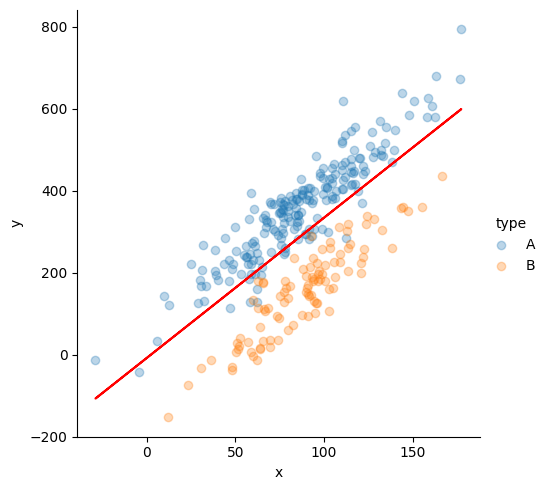

In [76]:
#on peut utiliser la fonction hue= 'type' afin de colorer les points en fonction de la variable 'type'
sns.lmplot('x', 'y', df, hue = 'type', scatter_kws={'alpha':0.3}, fit_reg=False)
#on ajoute la droite de régression
plt.plot(df['x'], df['pred'], color='red')
plt.show()

#### On a une seule et unique droite pour prédire les valeurs de A et de B, alors qu'il nous faudrait une droite par nuage de points

In [77]:
#Incluont maintenant la variable 'type' dans notre modèle
y = df['y']
X = df[['x', 'type']].copy()
X['constant'] = 1
#vérifions la forme de X
X.head()

,x,type,constant
0,74.917452,A,1
1,90.070992,B,1
2,98.893981,B,1
3,75.463101,A,1
4,69.851849,A,1


#### Afin d'inclure la variable 'type' dans notre modèle, nous devons d'abord la transformer en variable indicatrice, c'est a dire en variable binaire.
#### Ceci est obtenu avec la méthode pandas.get_dummies 

In [78]:
#on passe l'ensemble du dataframe à la fonction get_dummies, elle détectera automatiquement les variables catégorielles et les transformera en variables indicatrices
#drop_first=True permet de supprimer une des variables indicatrices pour éviter la colinéarité
X = pd.get_dummies(X, drop_first=True)
#vérifions la forme de X maintenant
X.head()

,x,constant,type_B
0,74.917452,1,0
1,90.070992,1,1
2,98.893981,1,1
3,75.463101,1,0
4,69.851849,1,0


#### Regardons les valeurs uniques pour type_B

In [79]:
X['type_B'].unique()

array([0, 1], dtype=uint8)

#### Nous avons des 0 et des 1 qui signalent la présence ou l'absence du Type B
#### Etant donné que nous n'avons que deux types, la présence de l'un exclut celle de l'autre
#### Ce qui se passe ici est que le paramètre assigné à la colonne type_b va être ajouter à l'intercept globale (e.g. constante)
#### Les intercepts pour les types A et B seront alors différents, mais les pentes elles seront les mêmes

#### Une autre approche, ci-dessus consiste à donner une valeur de pente uniquement quand le Type A ou B apparait.

In [80]:
#Incluont maintenant la variable 'type' dans notre modèle
y = df['y']
X = df[['x', 'type']].copy()
X = pd.get_dummies(X, drop_first=False)
X.head()

,x,type_A,type_B
0,74.917452,1,0
1,90.070992,0,1
2,98.893981,0,1
3,75.463101,1,0
4,69.851849,1,0


#### Regardons le résultat

In [81]:
model = LinearRegression().fit(X, y)
df['pred'] = model.predict(X)
df['res'] = df['y'] - df['pred']
R2 = model.score(X, y)
print(f'Le R2 score est de {R2}')

Le R2 score est de 0.8931880132640806


#### On obtient un bien meilleur score R2

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


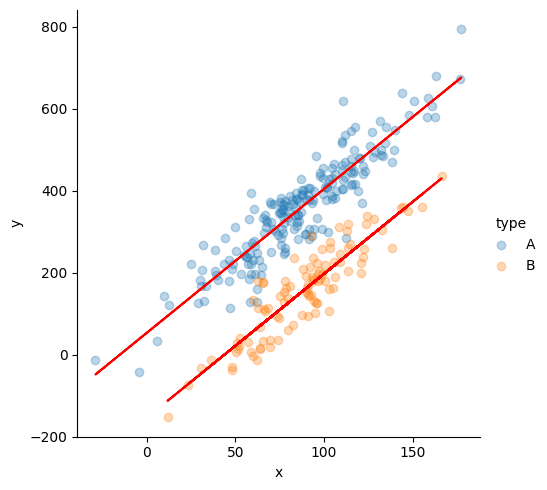

In [82]:
sns.lmplot('x', 'y', df, hue = 'type', scatter_kws={'alpha':0.3}, fit_reg=False)
plt.plot(df[df["type"] == "A"]['x'], df[df['type'] == "A"]['pred'], color='red')
plt.plot(df[df["type"] == "B"]['x'], df[df['type'] == "B"]['pred'], color='red')
plt.show()

#### On observe bien deux droites, une pour A et une pour B, avec des intercept différentes mais la même pente 

## 3. **Modèle linéaire pour des cas plus complexes**
###    **1. Ajout de variables qualitatives/catégorielles**
#### **1. Avec interaction**

In [83]:
df = make_data_slope()
#randomly shuffle the row of the dataframe
df = df.sample(frac=1)
df = df.reset_index(drop=True)

In [84]:
df.head(10)

,x,y,type
0,52.870408,537.086385,B
1,96.068462,1024.887199,B
2,69.282078,464.002125,A
3,88.501591,1164.774382,B
4,58.116835,467.861476,A
5,115.769053,397.550097,A
6,29.800123,16.784889,A
7,96.776994,746.517684,B
8,171.669617,920.705952,A
9,12.455664,-95.341063,A


/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


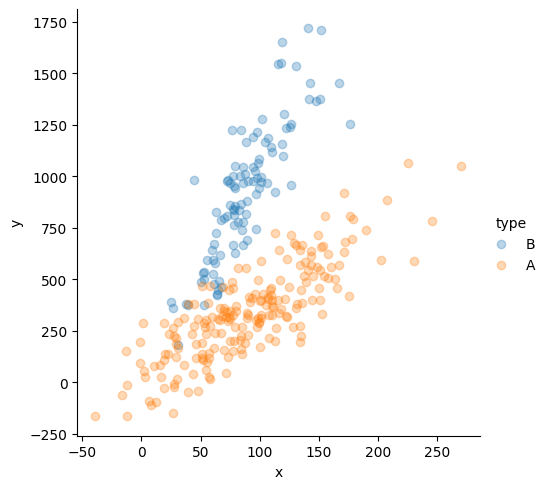

In [85]:
sns.lmplot('x', 'y', df, hue = 'type', scatter_kws={'alpha':0.3}, fit_reg=False)
plt.show()

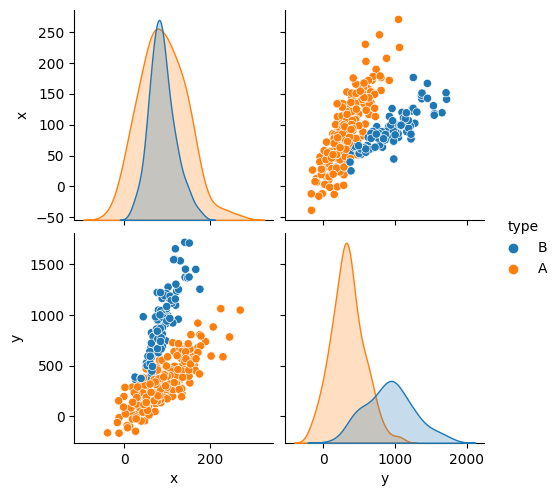

In [86]:
sns.pairplot(df, hue='type')

#### Il semble ici aussi que les types A et B représentent deux nuages de points distinctes
#### Faisons passer deux droites comme précédemment et observons le résultats

In [87]:
#Incluont maintenant la variable 'type' dans notre modèle
y = df['y']
X = df[['x', 'type']].copy()
X = pd.get_dummies(X, drop_first=False)
X.head(10)

,x,type_A,type_B
0,52.870408,0,1
1,96.068462,0,1
2,69.282078,1,0
3,88.501591,0,1
4,58.116835,1,0
5,115.769053,1,0
6,29.800123,1,0
7,96.776994,0,1
8,171.669617,1,0
9,12.455664,1,0


In [88]:
model = LinearRegression().fit(X, y)
df['pred'] = model.predict(X)
df['error'] = df['y'] - df['pred']
R2 = model.score(X, y)
print(f'Le R2 score est de {R2}')

Le R2 score est de 0.7916693692684279


#### Visualisons le modèle

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


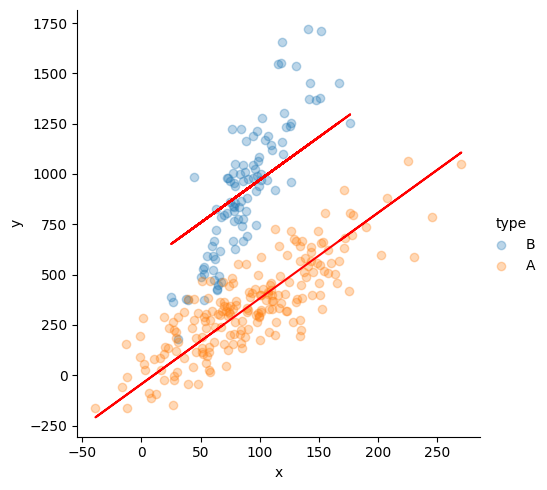

In [89]:
sns.lmplot('x', 'y', df, hue = 'type', scatter_kws={'alpha':0.3}, fit_reg=False)
plt.plot(df[df["type"] == "A"]['x'], df[df['type'] == "A"]['pred'], color='red')
plt.plot(df[df["type"] == "B"]['x'], df[df['type'] == "B"]['pred'], color='red')
plt.show()

#### La droite semble correcte pour le type A mais celle du type B semble louche, regardons cela de plus près.
#### Regardons la répartition des résidus du modèle

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Observed vs Predicted values')

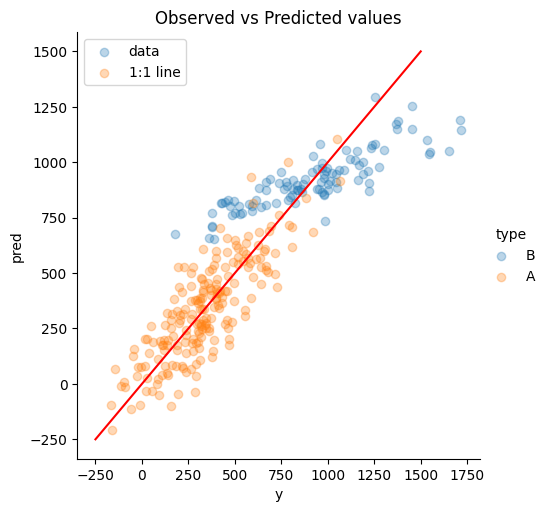

In [90]:
#make a graph of the observed vs predicted values
sns.lmplot('y', 'pred', df, scatter_kws={'alpha':0.3}, hue = 'type', fit_reg=None)
plt.plot([-250, 1500], [-250, 1500], color='red')
#add legend for the 1:1 line
plt.legend(['data', '1:1 line'])
plt.title('Observed vs Predicted values')

#### On voit ici clairement que les données prédites pour le type B ne suit pas la ligne 1:1 donc ne colle pas avec les valeurs observés d'entrainement.

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


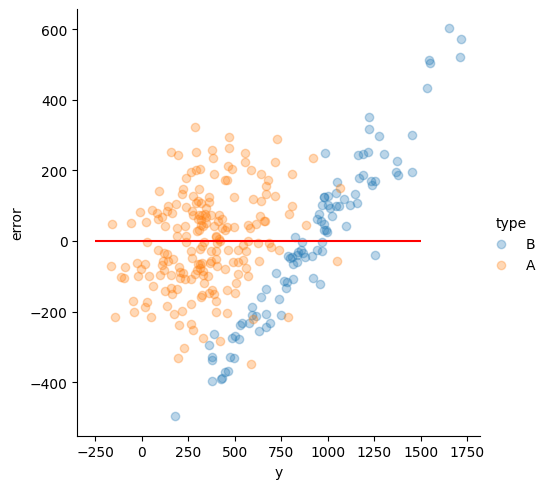

In [91]:
sns.lmplot('y', 'error', df, fit_reg=None, hue = 'type', scatter_kws={'alpha':0.3})
plt.hlines(0, -250, 1500, color='red')

#### Idem, la repartition des résidus n'est pas homogène pour le type B alors qu'elle semble l'être pour le type A

#### Regardons la régression pour Type B

/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


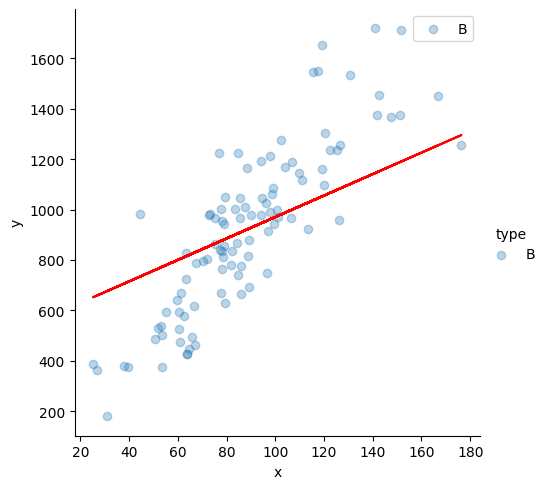

In [92]:
sns.lmplot('x', 'y', df[df["type"] == "B"], hue = 'type', scatter_kws={'alpha':0.3}, fit_reg=False)
plt.plot(df[df["type"] == "B"]['x'], df[df['type'] == "B"]['pred'], color='red')
plt.legend()
plt.show()

#### En effet la pente ainsi que l'intercept ne semble pas coller aux les données pour le type B
#### La raison pour laquelle nous observons cela est nous n'avons pas autoriser les pentes à être ajuster pour les différents types, nous n'avons qu'une pente globale pour les types A et B 

#### Autoriser les pentes à être ajustées indépendamment pour des variables catégorielles nécessite l'ajout d'un terme **d'interaction** dans le modèle

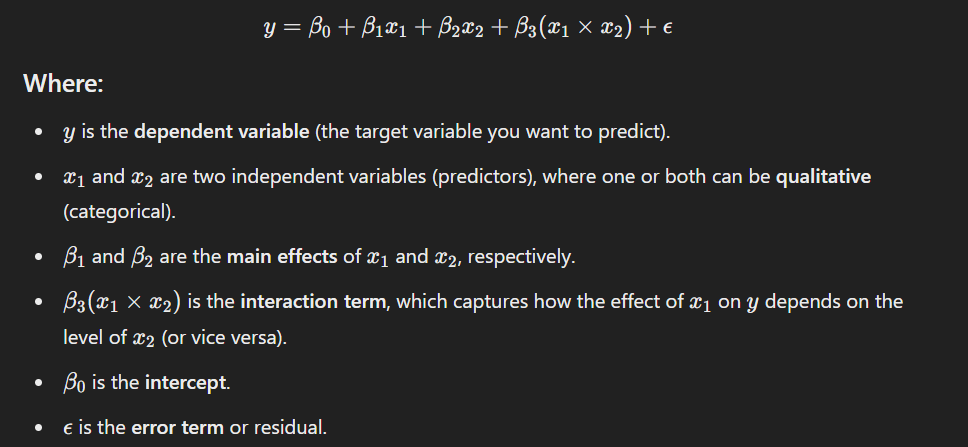

In [93]:
Image("image/LM_interaction.png")

#### Mettons cela en pratique dans notre dataframe d'entrainement

In [94]:
y = df['y']
X = df[['x', 'type']].copy()
X['constant'] = 1
X = pd.get_dummies(X, drop_first=True)
#vérifions la forme de X
X.head(10)

,x,constant,type_B
0,52.870408,1,1
1,96.068462,1,1
2,69.282078,1,0
3,88.501591,1,1
4,58.116835,1,0
5,115.769053,1,0
6,29.800123,1,0
7,96.776994,1,1
8,171.669617,1,0
9,12.455664,1,0


#### Ajustons une colonne pour le terme d'interaction
#### On multiple simplement la colonne 'x' par la colonne 'type_B' afin de créer une nouvelle colonne sur laquelle pourra être déterminé un paramètre d'interaction.

In [95]:
X['interaction'] = X['x'] * X['type_B']
#vérifions la forme de X
X.head(10)

,x,constant,type_B,interaction
0,52.870408,1,1,52.870408
1,96.068462,1,1,96.068462
2,69.282078,1,0,0.000000
3,88.501591,1,1,88.501591
4,58.116835,1,0,0.000000
5,115.769053,1,0,0.000000
6,29.800123,1,0,0.000000
7,96.776994,1,1,96.776994
8,171.669617,1,0,0.000000
9,12.455664,1,0,0.000000


#### Intuitivement, ici, quand le type_B est absent (Type = A) la droite aura pour paramètres ceux ajustés pour les colonnes 'x' (pente) et 'constant' (intercept), les autres sont multiplés par 0 (car des 0 sont présents en valeur).
#### Quand type_B est présent, les valeurs seront corrigées pour l'intercept ('constant' + 'type_B) et pour la pente ('x' + 'interaction') 

In [96]:
model = LinearRegression().fit(X, y)
df['pred'] = model.predict(X)
df['res'] = df['y'] - df['pred']
R2 = model.score(X, y)
print(f'Le R2 score est de {R2}')

Le R2 score est de 0.8554697027687541


/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


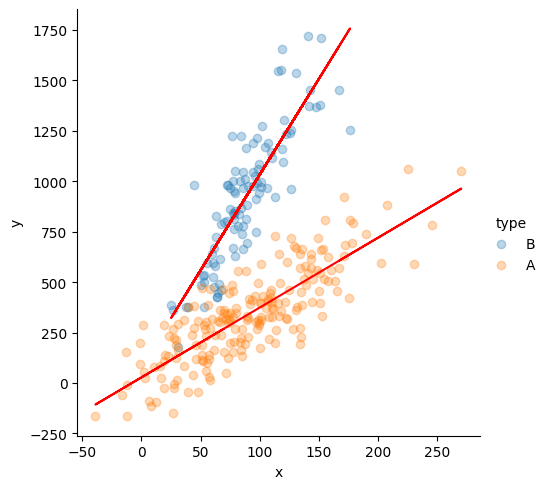

In [97]:
sns.lmplot('x', 'y', df, hue = 'type', scatter_kws={'alpha':0.3}, fit_reg=False)
plt.plot(df[df["type"] == "A"]['x'], df[df['type'] == "A"]['pred'], color='red')
plt.plot(df[df["type"] == "B"]['x'], df[df['type'] == "B"]['pred'], color='red')
plt.show()

#### Les droites possèdent maintenant leurs propres intercepts et pentes!!!
#### 


## 3. **Régression Polynomial**

In [98]:
df = make_data_poly()

In [99]:
df.head()

,x,y
0,-2.166694,2.055123
1,-0.469561,1.903252
2,-1.306190,-0.258500
3,-0.492640,2.632485
4,-0.175714,2.063368


/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


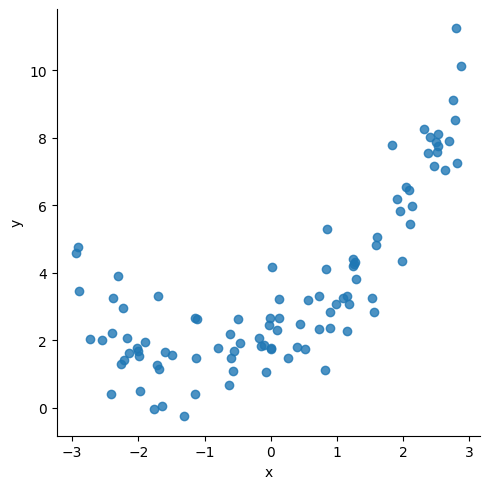

In [100]:
sns.lmplot('x', 'y', df, fit_reg=False)
plt.show()

#### Ici on observe que la relation entre X et Y n'est pas linéaire, mais ressemble à polynome du second degré.
#### On peut néanmoins utiliser une extention du modèle linéaire sur ce type de données en rajoutant un ou plusieurs termes pour capturer la non-linéairité de la relation entre les données, #### Ici un polynome du second dégré >>> modèle quadratique 

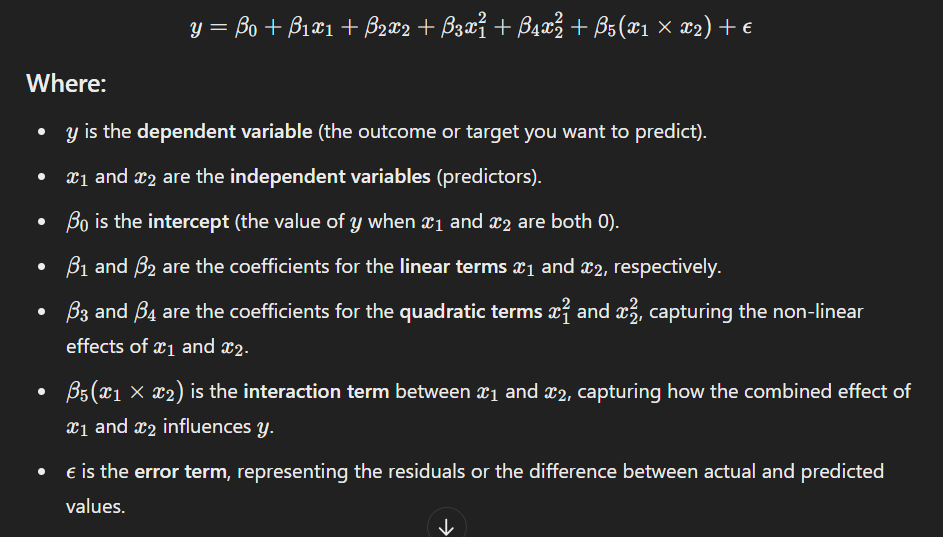

In [101]:
Image("image/LM_quadratic.png")

#### On repète les mêmes étapes que précedemment

In [102]:
y = df['y']
X = df[['x']].copy()
X['constant'] = 1
#vérifions la forme de X
X.head(5)

,x,constant
0,-2.166694,1
1,-0.469561,1
2,-1.306190,1
3,-0.492640,1
4,-0.175714,1


#### Et on ajoute une colonne qui contient notre variable X mise au carré

In [103]:
X['x2'] = X['x'] ** 2
X.head(5)

,x,constant,x2
0,-2.166694,1,4.694563
1,-0.469561,1,0.220487
2,-1.306190,1,1.706131
3,-0.492640,1,0.242695
4,-0.175714,1,0.030875


#### On utilise le modèle linéaire comme précédemment

In [104]:
model = LinearRegression().fit(X, y)
df['pred'] = model.predict(X)
df['res'] = df['y'] - df['pred']
R2 = model.score(X, y)
print(f'Le R2 score est de {R2}')

Le R2 score est de 0.8579872625239103


/home/jerome/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


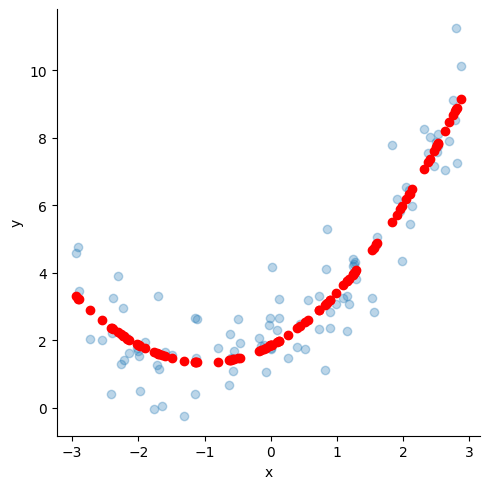

In [105]:
sns.lmplot('x', 'y', df, scatter_kws={'alpha':0.3}, fit_reg=False)
plt.scatter(df['x'], df['pred'], color='red')
plt.show()

#### Le modèle linéaire peut être étendu sous une multitude de formes, et cela peut vite devenir très complexe et au final peut efficace si l'objectif est de réaliser un modèle prédictif. D'autres modèles sont aujourd'hui beaucoup plus répandus pour réaliser des tâches de régression, en particulier les modèles d'ensemble.   
#### Le modèle linéaire reste néanmoins le socle en apprentissage machine pour des tâches de régression et nous a permis d'explorer un ensemble de concepts de base communs aux autres algorythmes de machine learning.
#### 1. La mesure de l'erreur et la fonction de coût (cost fonction)
#### 2. L'évaluation des performances du modèle avec le R2 (coéfficient de détermination)
#### 3. La descente de gradient
#### 4. le taux d'apprentissage
#### 5. L'utilisation de variables prédictives quantitatives et qualitatives/catégorielles
#### 6. L'implémentation de l'entrainement d'un modèle en python avec pandas et sklearn
#### Nous aborderons la prochaine fois le concept de régularisation et de cross-validation, ainsi que l'implémentation de ces concepts en python!